In [39]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import sklearn.linear_model as sklm 
import sklearn.decomposition as skdc
import sklearn.pipeline as skpl
%matplotlib inline

In [40]:
print(len(data))
data.head()

181


,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [41]:
#standardization
def standardization(x): #Define function to standardize the data, since all variables are not in the same units
    xmean = np.mean(x) ##calculate mean
    sd = np.std(x) ##calculate standard deviation 
    x_z = (x - xmean) / sd ##calculate standardized value to return
    return(x_z)

In [42]:
#data_temp=data.drop("Designation")
#data.columns=['Designation', 'Discovery Date YYYY-MM-DD', 'H (mag)',
       #'MOID (AU)', 'q (AU)', 'Q (AU)', 'period (yr)', 'i (deg)', 'PHA','Orbit Class']
#data_temp=data.drop("Discovery Date YYYY-MM-DD")
data = data.drop(['Designation','Discovery Date YYYY-MM-DD'], 1)
data.iloc[:,0:6] = data.iloc[:,0:6].apply(standardization,broadcast = True) 
data.head()



,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,-0.402246,-0.768113,-0.182201,0.278564,0.070213,-1.059432,Y,Apollo
1,0.124860,-0.810632,0.185133,-0.722908,-0.346462,-0.696463,Y,Apollo
2,-0.863463,1.042010,-2.018870,-0.433174,-0.304249,-0.056236,N,Apollo
3,-1.522345,0.647185,1.491208,0.193533,0.094723,0.001898,N,Amor
4,0.256636,-0.306470,-0.467905,-0.288307,-0.202123,-1.098934,N,Apollo


In [43]:
print(pd.get_dummies(data['Orbit Class']).head(5))
data['OrbitClass_dummies'] = pd.get_dummies(data['Orbit Class']).iloc[:,1]

#print(pd.get_dummies(data['Orbit Class'].head(1), dummy_na=True)

   Amor  Apollo  Aten
0     0       1     0
1     0       1     0
2     0       1     0
3     1       0     0
4     0       1     0


In [44]:
print(pd.get_dummies(data['PHA']).head(5))
data['PHA_dummies'] = pd.get_dummies(data['PHA']).iloc[:,1]

   N  Y
0  0  1
1  0  1
2  1  0
3  1  0
4  1  0


In [45]:
datacorr = data.corr() #correlation matrix, showing correlation between each variable and all the others
data.corr().head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),OrbitClass_dummies,PHA_dummies
H (mag),1.000000,-0.348351,0.066357,-0.122676,-0.061092,-0.404660,0.171101,0.080128
MOID (AU),-0.348351,1.000000,0.000562,0.691628,0.684569,0.513562,-0.170570,-0.368525
q (AU),0.066357,0.000562,1.000000,0.144295,0.159065,0.037985,-0.485099,-0.078787
Q (AU),-0.122676,0.691628,0.144295,1.000000,0.971313,0.423804,-0.062345,-0.128835
period (yr),-0.061092,0.684569,0.159065,0.971313,1.000000,0.417418,-0.096547,-0.078338


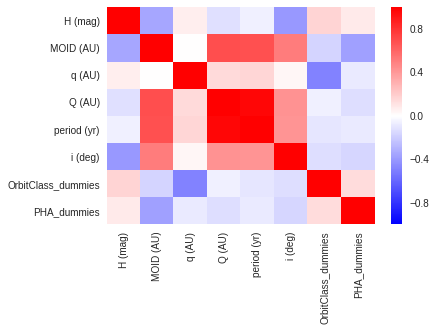

In [46]:
sb.heatmap(datacorr, cmap = 'bwr') #heatmap of correlation matrix
###darker colors represent higher correlation, several pairs of variables are highly correlated.

In [47]:
data = data.drop(['Orbit Class','PHA'],1)
data.head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),OrbitClass_dummies,PHA_dummies
0,-0.402246,-0.768113,-0.182201,0.278564,0.070213,-1.059432,1,1
1,0.124860,-0.810632,0.185133,-0.722908,-0.346462,-0.696463,1,1
2,-0.863463,1.042010,-2.018870,-0.433174,-0.304249,-0.056236,1,0
3,-1.522345,0.647185,1.491208,0.193533,0.094723,0.001898,0,0
4,0.256636,-0.306470,-0.467905,-0.288307,-0.202123,-1.098934,1,0


In [48]:
X = data.drop(['PHA_dummies'],1)
y = data['PHA_dummies']
X

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),OrbitClass_dummies
0,-0.402246,-0.768113,-0.182201,0.278564,0.070213,-1.059432,1
1,0.124860,-0.810632,0.185133,-0.722908,-0.346462,-0.696463,1
2,-0.863463,1.042010,-2.018870,-0.433174,-0.304249,-0.056236,1
3,-1.522345,0.647185,1.491208,0.193533,0.094723,0.001898,0
4,0.256636,-0.306470,-0.467905,-0.288307,-0.202123,-1.098934,1
5,-0.534022,-0.834929,-1.039313,-0.716610,-0.373695,-0.791118,0
6,-0.468134,-0.938191,-0.345461,-0.326099,-0.215740,0.297044,1
7,-1.522345,-0.804558,0.103503,-0.282009,-0.183060,-1.343397,1
8,-0.270469,-0.348990,-0.835239,-0.426876,-0.270207,0.212077,1
9,-0.599910,0.689705,-1.610722,-0.351293,-0.263399,0.664484,1


In [49]:
pca = skdc.PCA() #empty model space

In [50]:
pcafit = pca.fit_transform(X,y) ##apply dimensionality reduction to X

In [51]:
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))
### some variables are not needed
###since they explain less than.01 of the variance
print(sum(var_explained[0:10]))
##indeed,the first 6 PCs explain 99% of the variance

0    0.481835
1    0.198191
2    0.157818
3    0.082714
4    0.051141
5    0.024263
6    0.004038
dtype: float64
1.0


In [52]:
pca = skdc.PCA(n_components = 6) 
logreg = sklm.LogisticRegression()#empty model space
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)]) #create pipeline from pca to logregression space

In [53]:
model = pipeline.fit(X,y)
model

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [59]:
predYesRight = 0 #create count variables
predYesWrong = 0
predNoRight = 0
predNoWrong = 0

In [60]:
#LOOCV
for i in X.index: #run through each row in data set
    trainX = X.drop(i, 0) #train model with predictor dataframe, remove single row
    trainy = y.drop(i,0) #train model with response array, remove single row
    testX = X.ix[i,0:7].values.reshape(1,7) #Removed row will be test predictor 
    testy = y[i] #Removed value will be test response
    fit = pipeline.fit(trainX, trainy) #fit model
    prediction = pipeline.predict(testX) #test model with left out value
    if prediction == 1 and testy == 1:
        predYesRight += 1
    elif prediction == 1 and testy == 0:
        predYesWrong += 1
    elif prediction == 0 and testy == 1:
        predNoWrong += 1
    else:
        predNoRight += 1
        

In [61]:
print(predYesRight,predYesWrong,predNoRight,predNoWrong)

9 1 150 21


In [66]:
###Time to create a nice confusion matrix to visualize
c = {'Predicted No' : pd.Series([predNoRight, predNoWrong],index=['Actual No', 'Actual Yes']),
    'Predicted Yes': pd.Series([predYesWrong, predYesRight], index=['Actual No','Actual Yes'])}
confusionmat = pd.DataFrame(c)

In [67]:
confusionmat

,Predicted No,Predicted Yes
Actual No,150,1
Actual Yes,21,9


In [73]:
###Now sensitivity and specificity will be calculated
yr,yw = float(predYesRight), float(predYesWrong)
nw,nr = float(predNoWrong), float(predNoRight)
sens = yr/(yr+yw) #calculate sensitivity, or rate of correctly predicting disease
spec = nr/(nr+nw) #calculate specificity, or rate of correctly predicting no disease
acc = (sens + spec)/2 #calculate balanced accuracy, or average of sensitivty and specificity
mis = (yw+nw)/(yw+nw+yr+nr) #calculate misclassification rate

In [74]:
print('Sensitivity:',sens)
print('Specificity:',spec)
print('Balanced Accuracy:',acc)
print('Misclassification Rate:',mis)

Sensitivity: 0.9
Specificity: 0.8771929824561403
Balanced Accuracy: 0.8885964912280702
Misclassification Rate: 0.12154696132596685


In [92]:
#Let's see if we can improve the accuracy with a better probability threshold
#ideally sensitivity would be 1
for p in range(1,15): ##no probabilities >= .75
    probability = p*.05
    for i in X.index: 
        trainX = X.drop(i, 0) 
        trainy = y.drop(i,0) 
        testX = X.ix[i,0:7].values.reshape(1,7)  
        testy = y[i]
        fit = pipeline.fit(trainX, trainy) 
        predproba = pipeline.predict_proba(testX) 
        if predproba[0][1] >= probability:
            prediction = 1
        else:
            prediction = 0
        if prediction == 1 and testy == 1:
            predYesRight += 1
        elif prediction == 1 and testy == 0:
            predYesWrong += 1
        elif prediction == 0 and testy == 1:
            predNoWrong += 1
        else:
            predNoRight += 1
    yr,yw = float(predYesRight), float(predYesWrong)
    nw,nr = float(predNoWrong), float(predNoRight)
    sens = yr/(yr+yw) 
    spec = nr/(nr+nw) 
    acc = (sens + spec)/2 
    predYesRight = 0 
    predYesWrong = 0
    predNoRight = 0
    predNoWrong = 0
    print(probability, acc)

0.05 0.6442307692307692
0.1 0.6612903225806451
0.15000000000000002 0.689873417721519
0.2 0.7205882352941176
0.25 0.729091414281745
0.30000000000000004 0.755795739348371
0.35000000000000003 0.7641315519013361
0.4 0.8144257703081232
0.45 0.8127653927813163
0.5 0.8885964912280702
0.55 0.8596059113300492
0.6000000000000001 0.8452380952380952
0.65 0.7546816479400749
0.7000000000000001 0.7546816479400749


In [ ]:
#it seems that .5 is the ideal probability threshold